In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

In [3]:
num_words, num_training, num_testing, train_data, test_data, train_labels, test_labels = load_all_data()

Shelved file does not exist yet. Loading data from raw text files.
Finished loading in 209.46 seconds.


In [4]:
d = 5000 # maximum number of features

In [48]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print(gain)

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
print(train_data.shape)
test_data = test_data[ranks[:d], :]
bool_array = train_data[0,:].toarray().ravel()
split = train_data[:, bool_array]
print(train_labels[bool_array])

[ 0.10060696  0.09795364  0.08220415  0.08011339  0.07396533  0.07344176
  0.07177069  0.07129802  0.06781505  0.06602623  0.06249216  0.06232632
  0.06153948  0.06039504  0.05840825  0.05805665  0.05790892  0.05648282
  0.05611109  0.05446072  0.05369282  0.05353036  0.05350577  0.05317605
  0.05212438  0.05184297  0.05135332  0.05098514  0.05017322  0.04981521
  0.04929379  0.0490542   0.04897939  0.04874443  0.04850615  0.04509275
  0.04454584  0.04436476  0.04383811  0.04347201  0.04292297  0.04278922
  0.04272752  0.0422176   0.04208228  0.04110392  0.04104288  0.04068492
  0.04068109  0.04019829  0.03994515  0.03986229  0.03856486  0.03840129
  0.03819409  0.03761028  0.03735524  0.03708209  0.03693843  0.03681676
  0.03635817  0.0362138   0.03600648  0.03596166  0.03590354  0.03579624
  0.03547906  0.03515375  0.0350292   0.03485648  0.03483138  0.03476647
  0.03448758  0.0343656   0.03436029  0.03423308  0.03410258  0.03400384
  0.03353342  0.03332553  0.03331725  0.032873    0

In [49]:
# randomly shuffle data

order = range(num_training)
random.shuffle(order)

train_data = train_data[:, order]
train_labels = train_labels[order]

TypeError: 'range' object does not support item assignment

In [7]:
# Try naive Bayes with cross-validation

alpha_values = 10.0 ** np.array(range(-10,0))

cv_score = np.zeros(alpha_values.size)

params = dict()

for i in range(alpha_values.size):
    params['alpha'] = alpha_values[i]
    cv_score[i], _ = cross_validate(naive_bayes_train, naive_bayes_predict, 
                                    train_data, train_labels, 8, params)

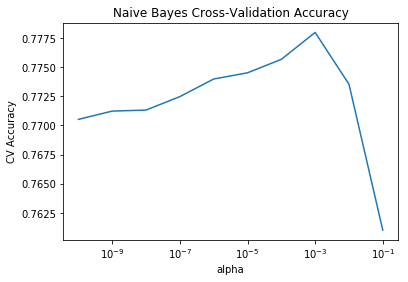

In [8]:
plt.semilogx(alpha_values, cv_score)
plt.xlabel('alpha')
plt.ylabel('CV Accuracy')
plt.title('Naive Bayes Cross-Validation Accuracy')

In [9]:
# Train on full data with best alpha value

best_alpha_index = cv_score.argmax()

params['alpha'] = alpha_values[best_alpha_index]

nb_model = naive_bayes_train(train_data, train_labels, params)

In [10]:
# Compute testing accuracy

nb_predictions = naive_bayes_predict(test_data, nb_model)

nb_accuracy = np.mean(nb_predictions == test_labels)

print("Naive Bayes testing accuracy: %f" % nb_accuracy)

Naive Bayes testing accuracy: 0.670886


In [50]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 250

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

In [51]:
depth_values = np.array([2, 4, 8, 16, 32, 64])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

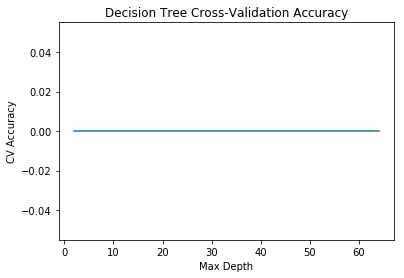

In [52]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [59]:
# Train on full data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

rank of left split
22
current root
0
rank of right split
1
current root
0
rank of left split
249
current root
22
rank of right split
49
current root
22
rank of left split
19
current root
1
rank of right split
1
current root
1


In [61]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)

print("Decision tree testing accuracy: %f" % dt_accuracy)

{0: {'prediction': None, 'l_child': {...}, 'r_child': {...}}, 22: {'prediction': None, 'l_child': {...}, 'r_child': {...}}, 249: {'prediction': 15, 'l_child': None, 'r_child': None}, 49: {'prediction': 15, 'l_child': None, 'r_child': None}, 1: {'prediction': 10, 'l_child': None, 'r_child': {...}}, 19: {'prediction': 2, 'l_child': None, 'r_child': None}}
Decision tree testing accuracy: 0.000000
